# Data Preprocess for Description & Game & User Table

Data preprocessing & EDA, built Description Table and Game Table.

In [1]:
import pandas as pd

# Description Table

In [2]:
# read data from steam.csv
steam_url = 'https://github.com/qihang-dai/SteamDB/blob/master/dataset/steam.csv?raw=true'
steam_df = pd.read_csv(steam_url)
steam_df = steam_df[["appid", "release_date", "english", "platforms", "developer", "genres", "positive_ratings", "negative_ratings", "average_playtime", "price"]]
steam_df.columns = ["app_id", "release_dt", "language", "platforms", "developer", "genres", "positive_ratings", "negative_ratings", "average_playtime", "price"]
steam_df['release_dt'] = pd.to_datetime(steam_df['release_dt'])

In [3]:
steam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   app_id            27075 non-null  int64         
 1   release_dt        27075 non-null  datetime64[ns]
 2   language          27075 non-null  int64         
 3   platforms         27075 non-null  object        
 4   developer         27075 non-null  object        
 5   genres            27075 non-null  object        
 6   positive_ratings  27075 non-null  int64         
 7   negative_ratings  27075 non-null  int64         
 8   average_playtime  27075 non-null  int64         
 9   price             27075 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 2.1+ MB


In [4]:
steam_df.isnull().any()

app_id              False
release_dt          False
language            False
platforms           False
developer           False
genres              False
positive_ratings    False
negative_ratings    False
average_playtime    False
price               False
dtype: bool

All rows are not-null, so we do not need to delete

In [5]:
# read data from steam_description_data.csv
dp_url = 'https://github.com/qihang-dai/SteamDB/blob/master/dataset/steam_description_data.csv?raw=true'
description_df = pd.read_csv(dp_url)
description_df = description_df[["steam_appid", "short_description"]]
description_df.columns = ["app_id", "short_description"]

In [6]:
description_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27334 entries, 0 to 27333
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   app_id             27334 non-null  int64 
 1   short_description  27334 non-null  object
dtypes: int64(1), object(1)
memory usage: 427.2+ KB


In [7]:
description_df.isnull().any()

app_id               False
short_description    False
dtype: bool

In [8]:
len(description_df["app_id"].unique())

27334

There are more app_ids in the description data than steam data. Because we use 1..1 relation in the ER diagram. So we drop the app_ids which do not have a match in steam_df. (Namely, inner join)

In [9]:
# Join the two dataframes
merged_df = pd.merge(steam_df, description_df, on = "app_id", how = "inner")

In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27075 entries, 0 to 27074
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   app_id             27075 non-null  int64         
 1   release_dt         27075 non-null  datetime64[ns]
 2   language           27075 non-null  int64         
 3   platforms          27075 non-null  object        
 4   developer          27075 non-null  object        
 5   genres             27075 non-null  object        
 6   positive_ratings   27075 non-null  int64         
 7   negative_ratings   27075 non-null  int64         
 8   average_playtime   27075 non-null  int64         
 9   price              27075 non-null  float64       
 10  short_description  27075 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 2.5+ MB


In [11]:
merged_df.to_csv("description.csv",index = False)

## Simple EDA on description table

In [12]:
print("earlist_release_date:", min(merged_df['release_dt']))
print("latest_release_date:", max(merged_df['release_dt']))

earlist_release_date: 1997-06-30 00:00:00
latest_release_date: 2019-05-01 00:00:00


In [13]:
merged_df.describe()

,app_id,language,positive_ratings,negative_ratings,average_playtime,price
count,2.707500e+04,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.000000
mean,5.962035e+05,0.981127,1.000559e+03,211.027147,149.804949,6.078193
std,2.508942e+05,0.136081,1.898872e+04,4284.938531,1827.038141,7.874922
min,1.000000e+01,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,4.012300e+05,1.000000,6.000000e+00,2.000000,0.000000,1.690000
50%,5.990700e+05,1.000000,2.400000e+01,9.000000,0.000000,3.990000
75%,7.987600e+05,1.000000,1.260000e+02,42.000000,0.000000,7.190000
max,1.069460e+06,1.000000,2.644404e+06,487076.000000,190625.000000,421.990000


In [14]:
merged_df["release_year"] = merged_df['release_dt'].dt.year

<AxesSubplot: >

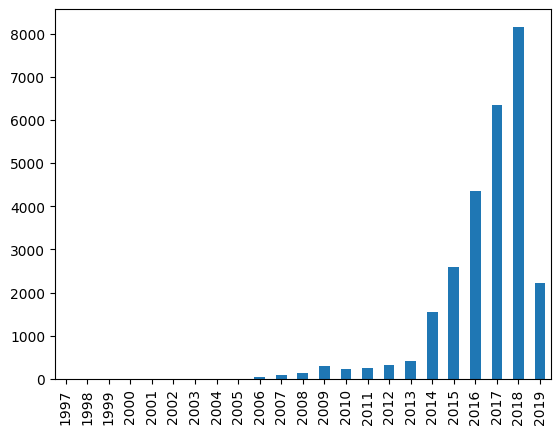

In [15]:
merged_df["release_year"].value_counts().sort_index().plot(kind = "bar")

In [2]:
import numpy as np
import pandas as pd

In [3]:
merged_df = pd.read_csv("description.csv")

In [5]:
merged_df.head()

,app_id,release_dt,language,platforms,developer,genres,positive_ratings,negative_ratings,average_playtime,price,short_description
0,10,2000-11-01,1,windows;mac;linux,Valve,Action,124534,3339,17612,7.19,Play the world's number 1 online action game. ...
1,20,1999-04-01,1,windows;mac;linux,Valve,Action,3318,633,277,3.99,One of the most popular online action games of...
2,30,2003-05-01,1,windows;mac;linux,Valve,Action,3416,398,187,3.99,Enlist in an intense brand of Axis vs. Allied ...
3,40,2001-06-01,1,windows;mac;linux,Valve,Action,1273,267,258,3.99,Enjoy fast-paced multiplayer gaming with Death...
4,50,1999-11-01,1,windows;mac;linux,Gearbox Software,Action,5250,288,624,3.99,Return to the Black Mesa Research Facility as ...


In [19]:
merged_df[merged_df['price'] < 20].count()

app_id               26150
release_dt           26150
language             26150
platforms            26150
developer            26150
genres               26150
positive_ratings     26150
negative_ratings     26150
average_playtime     26150
price                26150
short_description    26150
dtype: int64

<AxesSubplot: ylabel='Frequency'>

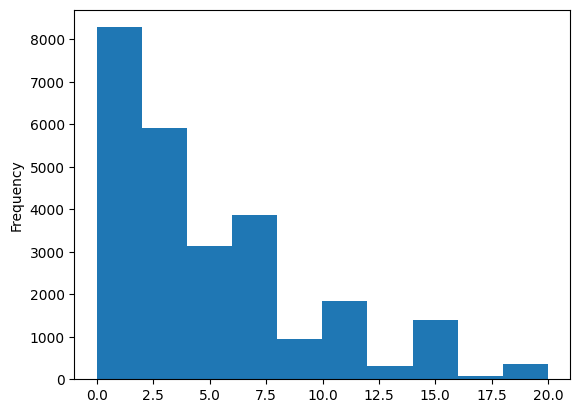

In [20]:
merged_df[merged_df['price'] < 20]['price'].plot(kind = "hist")

In [21]:
merged_df[merged_df['price'] == 0].count()

app_id               2560
release_dt           2560
language             2560
platforms            2560
developer            2560
genres               2560
positive_ratings     2560
negative_ratings     2560
average_playtime     2560
price                2560
short_description    2560
dtype: int64

<AxesSubplot: >

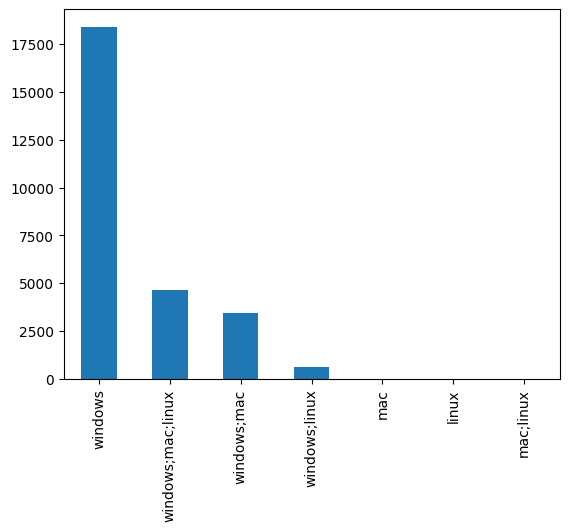

In [22]:
merged_df['platforms'].value_counts().plot(kind = "bar")

In [23]:
merged_df['genres'].apply(lambda x: "Action" in x or "action" in x).sum()

11903

There are 11903 games which have a label "action"

In [24]:
merged_df['genres'].apply(lambda x: x.split(";"))

0                          [Action]
1                          [Action]
2                          [Action]
3                          [Action]
4                          [Action]
                    ...            
27070    [Adventure, Casual, Indie]
27071    [Action, Adventure, Indie]
27072       [Action, Casual, Indie]
27073    [Adventure, Casual, Indie]
27074    [Adventure, Casual, Indie]
Name: genres, Length: 27075, dtype: object

In [25]:
# Some games have multiple genres, split them and print all the genres
genres_stat = {}
for genres in merged_df['genres'].apply(lambda x: x.split(";")):
    for genre in genres:
        if genre in genres_stat:
            genres_stat[genre] += 1
        else:
            genres_stat[genre] = 1
genres_stat

{'Action': 11903,
 'Free to Play': 1704,
 'Strategy': 5247,
 'Adventure': 10032,
 'Indie': 19421,
 'RPG': 4311,
 'Animation & Modeling': 79,
 'Video Production': 38,
 'Casual': 10210,
 'Simulation': 5194,
 'Racing': 1024,
 'Violent': 843,
 'Massively Multiplayer': 723,
 'Nudity': 266,
 'Sports': 1322,
 'Early Access': 2954,
 'Gore': 537,
 'Utilities': 146,
 'Design & Illustration': 87,
 'Web Publishing': 28,
 'Education': 51,
 'Software Training': 31,
 'Sexual Content': 245,
 'Audio Production': 29,
 'Game Development': 17,
 'Photo Editing': 12,
 'Accounting': 6,
 'Documentary': 1,
 'Tutorial': 1}

In [26]:
import matplotlib.pyplot as plt 

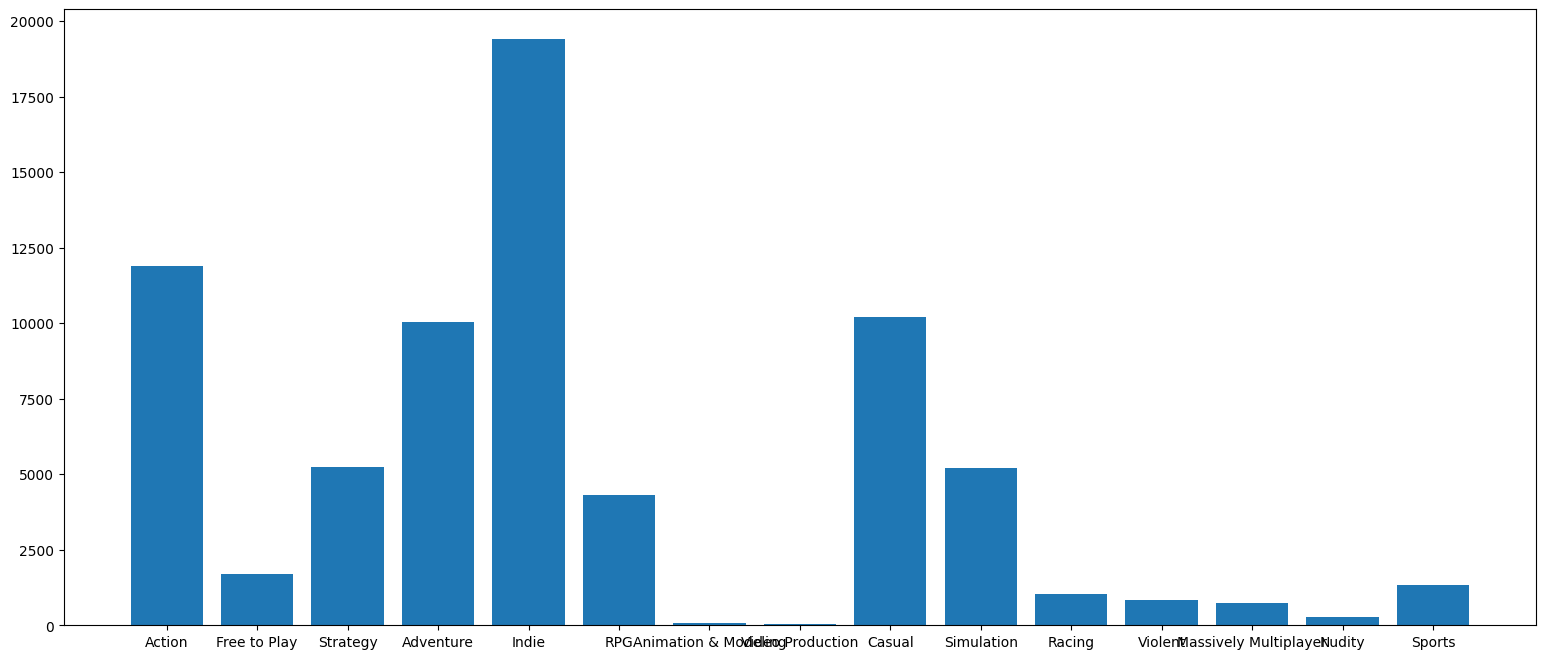

In [27]:
plt.figure(figsize = (19, 8))
keys = list(genres_stat.keys())[:15]
values = list(genres_stat.values())[:15]
plt.bar(range(15), values, tick_label=keys)
plt.show()

## Game Table

In [28]:
import pandas as pd
game_url = 'https://github.com/qihang-dai/SteamDB/blob/master/dataset/steam.csv?raw=true'
game_df = pd.read_csv(game_url)

In [29]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

In [30]:
#slice table with appid and name
game_df = game_df[['appid', 'name']]
game_df.head(5)
game_df.columns = ['appid', 'name']
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   appid   27075 non-null  int64 
 1   name    27075 non-null  object
dtypes: int64(1), object(1)
memory usage: 423.2+ KB


In [31]:
# check missing value in game_df
game_df.isnull().any()

appid    False
name     False
dtype: bool

In [32]:
# remove missing value in game_df
game_df.isnull().sum()
game_df.dropna()


,appid,name
0,10,Counter-Strike
1,20,Team Fortress Classic
2,30,Day of Defeat
3,40,Deathmatch Classic
4,50,Half-Life: Opposing Force
...,...,...
27070,1065230,Room of Pandora
27071,1065570,Cyber Gun
27072,1065650,Super Star Blast
27073,1066700,New Yankee 7: Deer Hunters


In [33]:
# check whether appid - primary key is unique
print(len(game_df['appid'].unique()) == len(game_df))

True


In [34]:
# finish preprocess for Game(app_id, name) table 
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   appid   27075 non-null  int64 
 1   name    27075 non-null  object
dtypes: int64(1), object(1)
memory usage: 423.2+ KB


In [35]:
# save to csv
game_df.to_csv('game_df.csv', index = False)

In [1]:


df_1 = _deepnote_execute_sql("""WITH House AS(
    SELECT PId FROM Property
    WHERE p.Type = 'house'
)
SELECT g.GId, g.Name 
FROM Guest g JOIN Stay s ON g.GId = s.GId 
JOIN HOUSE h ON s.PId = h.PId 
WHERE s.Date_of_Stay = "10/2/2021"
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_1

ExecuteSqlError: There is no Dataframe named Property in scope!

In [1]:
import pandas as pd 
import numpy as np

In [3]:
own_df = pd.read_csv("own.csv")

In [6]:
description_df = pd.read_csv("description.csv")

In [12]:
description_df.sort_values(by = "positive_ratings", inplace = True, ascending = False)

In [14]:
head_df = description_df[["app_id"]].head(5000)

In [16]:
app = head_df['app_id'].tolist()

In [20]:
user_df = own_df[["user_id"]].drop_duplicates()

In [25]:
res_df = own_df.head(5)
for i in range(7):
    temp_df = user_df[["user_id"]]
    temp_df['app_id'] = temp_df["user_id"].apply(lambda x:np.random.choice(app))
    res_df = res_df.append(temp_df)

In [28]:
res_df = res_df.append(own_df)

In [29]:
res_df = res_df.drop_duplicates()

In [30]:
len(res_df)

826474

In [33]:
res_df.to_csv("own_game.csv", index = False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f4a20f72-a78a-44f8-9f5b-8ee110933339' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>